## KNeighbors с помощью библиотеки

In [1]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from collections import Counter
#style.use('fivethirtyeight') #тип графиков
import warnings
import random 
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

Датасет с анализом рака груди

In [2]:
df = pd.DataFrame(data=pd.read_csv('breast-cancer-wisconsin.data'))

In [3]:
df.replace('?', -99999, inplace=True) #-9999 большинство алгоритмов распознают - это как выброс 
df.drop(['id'], axis=1, inplace=True)

In [4]:
df.columns

Index([' clump_thickness', ' unif_cell_size', ' unif_cell_shape',
       ' marg_adhesion', ' single_epith_cell_size', ' bare_nuclei',
       ' bland_chrom', ' norm_nucleoli', ' mitoses', ' class '],
      dtype='object')

In [5]:
X = np.array(df.drop([' class '], 1))
y = np.array(df[' class '])

C:\Users\yanka\AppData\Local\Temp/ipykernel_18436/607400738.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop([' class '], 1))


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
clf  = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
accuracy

0.9785714285714285

## Теперь построим алгоритм с нуля:

Уточним насчет Евклидового пространства:

  n
 
√Σ(qi - pi)^2

  i
  
q - координаты для точки 1

p - координаты для точки 2
 
n - количество пространств
i - 1. i начинается с одного

Допустим

q(1, 2)

p(2, 5)

А значит, у нас два измерения

Подставляем

√(1 - 2)^2 + (3 - 5)^2

In [8]:
plot1 = [1, 3]
plot2 = [2, 5]

euclidean_distance = sqrt((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2) #мы можем заменить этот код np.linalg.norm()

print(euclidean_distance)

2.23606797749979


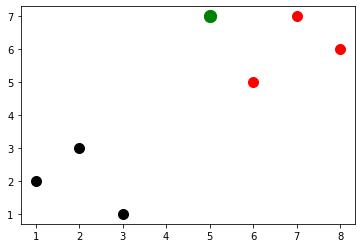

In [9]:
dataset = {'k':[[1, 2], [2, 3], [3, 1]], #класс к с данными признаками
          'r':[[6, 5], [7, 7], [8, 6]]
          } 
new_features = [5, 7] #для предсказания

for Class in dataset:
    for feature in dataset[Class]:
        plt.scatter(feature[0], feature[1], s = 100, color = Class)
plt.scatter(new_features[0], new_features[1], s = 150, color = 'g')
plt.show()
        
#[[plt.scatter(feature[0], feature[1], s = 100, color = Class) for featrue in dataset[Class]] for Class in dataset]
#можно еще так начертить точки


In [10]:
#Проблема в данном алгоритме в том, что для того, чтобы понять какая точка самая ближайшая к нужной нам точке, нужно посчитать
#расстояние между нужной точкой и всеми остальными точками. Мы можем использовать радиус для того, чтобы "поймать" ближайшие
#точки

def k_nearest_neighbors(data, predict, k=3):
    #Ошибка информаирующая о том, что классов в датасете меньше, чем k
    if len(data) >= k:
        warnings.warn('K is set to a value less then total voting groups!') 
    distances = []
    for group in data:
        for features in data[group]:
            euclidian_distance = np.linalg.norm(np.array(features) - np.array(predict))
            #добавим в distance расстояние от предикта до группы
            distances.append([euclidian_distance, group]) 
            
    votes = [i[1] for i in sorted(distances)[:k]] #находим блажайшие точки до точки, которую надо "предсказать" и берем классы
    #этих точек, а список урезаем до 3 ближайших соседей (k)
    #print(votes)
    vote_result = Counter(votes).most_common(1)[0][0] #находим количество ближайших классов и берем самый близкий
    #можем проверить confidence
    confidence = Counter(votes).most_common(1)[0][1] / k #здесь делим количество найденных классов на заданное число классов
    #Если у нас будут первые три найденные класса, то у нас будет два числа, которые покажут уверенность модели в том, что
    #мы имеем дело с таким то классом. Если один класс, то одно число
    #print(Counter(votes).most_common(1)) 
    
    #print(vote_result, confidence)
    
    return vote_result, confidence

In [11]:
result = k_nearest_neighbors(dataset, new_features, k=3)
result

('r', 1.0)

Построим график на котром точка, которую нужно было кластеризировать будем иметь цвет своего ближайшего класса:

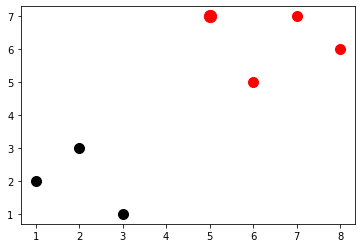

In [12]:
for Class in dataset:
    for feature in dataset[Class]:
        plt.scatter(feature[0], feature[1], s = 100, color = Class)
plt.scatter(new_features[0], new_features[1], s = 150, color = result[0])
plt.show()

In [13]:
full_data = df.astype(float).values.tolist() #некоторые данные здесь в кавычках (пр. "4", сделаем их int)

In [14]:
random.shuffle(full_data)

In [15]:
#напишем функцию для test_split
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [16]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [17]:
#x_train, x_test = train_test_split(full_data, test_size=0.2)

In [18]:
#подсчет accuracy
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]: 
        vote, confidence = k_nearest_neighbors(train_set, data, k=5) #k=5 - дефолтное значение
        if group == vote:
            correct += 1 #если классы совпали 
        else: 
            print(confidence) #если классы не совпали выводится значение уверенности в классе
        total +=1 #общее количество итераций в цикле
print('Accuracy:', correct/total)        

1.0
0.6
0.6
1.0
Accuracy: 0.9712230215827338


Если пытаться увеличить значение k, то в данном случае значение accuracy не будет увиличиваться, а даже немного упадет

Стоит уточнить, что применение k-ближайших соседей хорош в том, случае, когда данные сложно разделить, к примеру, линейной регрессией. То есть когда между классами трудно провести линию. В данном случае будет лучше использовать алгоритм k-ближайших соседей.